# Importing libraries 

In [2]:
import quandl 
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import os 
import warnings 
import nasdaqdatalink

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

# Connecting data to api

In [3]:
# quandl.ApiConfig.api_key = '_z_5rnVn8Y7X1b7Za3rt'
# Commented out because we are not going to use quandl

In [62]:
# data = quandl.get('ZSFH/value')
# data = quandl.get('ZILLOW/DATA')
# I commented this out because according to the Python reference page at: https://data.nasdaq.com/databases/ZILLOW#anchor-zillow-data-zillow-data-, I should be using the nasdaqdatalink library

# Nasdaqdatalink.ApiConfig.api_key = _z_5rnVn8Y7X1b7Za3rt
# Nasdaqdatalink.get_table('ZILLOW/DATA',indicator_id='ZSFH', region_id='99999')
# Changed to: Below

nasdaqdatalink.ApiConfig.api_key = '_z_5rnVn8Y7X1b7Za3rt'
data = nasdaqdatalink.get_table('ZILLOW/DATA',indicator_id='ZALL')





print(data)

     indicator_id region_id       date          value
None                                                 
0            ZALL     99999 2024-03-31  470134.085664
1            ZALL     99999 2024-02-29  470587.398347
2            ZALL     99999 2024-01-31  474209.545056
3            ZALL     99999 2023-12-31  477959.273568
4            ZALL     99999 2023-11-30  481187.538356
...           ...       ...        ...            ...
9995         ZALL     99959 2006-10-31  276832.217768
9996         ZALL     99959 2006-09-30  274718.545494
9997         ZALL     99959 2006-08-31  272673.793032
9998         ZALL     99959 2006-07-31  268953.064791
9999         ZALL     99959 2006-06-30  264610.160166

[10000 rows x 4 columns]


# Cleaning and Wrangling

In [54]:
indicators = nasdaqdatalink.get_table('ZILLOW/INDICATORS')
print(indicators)

     indicator_id                                          indicator  \
None                                                                   
0            ZSFH           ZHVI Single-Family Homes Time Series ($)   
1            ZCON                   ZHVI Condo/Co-op Time Series ($)   
2            ZATT           ZHVI All Homes- Top Tier Time Series ($)   
3            ZALL  ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)   
4            ZABT        ZHVI All Homes- Bottom Tier Time Series ($)   
5            Z5BR                    ZHVI 5+ Bedroom Time Series ($)   
6            Z4BR                     ZHVI 4-Bedroom Time Series ($)   
7            Z3BR                     ZHVI 3-Bedroom Time Series ($)   
8            Z2BR                     ZHVI 2-Bedroom Time Series ($)   
9            Z1BR                     ZHVI 1-Bedroom Time Series ($)   
10           SSSW  Median Sale Price (Smooth, SFR only, Weekly View)   
11           SSSM      Median Sale Price (Smooth, SFR only, Mont

In [55]:

#Looking at the regions to filter out all data that isn't denver colorado data
regions = nasdaqdatalink.get_table('ZILLOW/REGIONS')
print(regions)




     region_id region_type                                             region
None                                                                         
0        99999         zip   98847;WA;Wenatchee, WA;Leavenworth;Chelan County
1        99998         zip               98846;WA;nan;Pateros;Okanogan County
2        99997         zip    98845; WA; Wenatchee; Douglas County; Palisades
3        99996         zip              98844;WA;nan;Oroville;Okanogan County
4        99995         zip       98843;WA;Wenatchee, WA;Orondo;Douglas County
...        ...         ...                                                ...
9995     87003         zip  65783; MO; Springfield, MO; Dallas County; Win...
9996     87002         zip     65781;MO;Springfield, MO;Willard;Greene County
9997     87001         zip                    65779;MO;nan;nan;Hickory County
9998     87000         zip                  65778;MO;nan;Myrtle;Oregon County
9999       870      county                     Benton County;OR;

In [63]:
#actually filtering the data to only inlude region_id's that are in denver colorado 
denver_regions = regions[(regions['region_type'] == 'zip') & (regions['region'].str.contains('Denver')) & (regions['region'].str.contains('CO;'))]
print(denver_regions)

     region_id region_type                                             region
None                                                                         
4567     93570         zip  80835;CO;Denver-Aurora-Lakewood, CO;Simla;Elbe...
4570     93567         zip  80832;CO;Denver-Aurora-Lakewood, CO;Matheson;E...
4572     93565         zip  80830; CO; Denver-Aurora-Lakewood, CO; Elbert ...
4575     93562         zip  80827;CO;Denver-Aurora-Lakewood, CO;Lake Georg...
4581     93555         zip  80820;CO;Denver-Aurora-Lakewood, CO;Guffey;Par...
...        ...         ...                                                ...
4859     93199         zip  80007;CO;Denver-Aurora-Lakewood, CO;Arvada;Jef...
4860     93197         zip  80005;CO;Denver-Aurora-Lakewood, CO;nan;Jeffer...
4861     93196         zip  80004;CO;Denver-Aurora-Lakewood, CO;Arvada;Jef...
4862     93195         zip  80003;CO;Denver-Aurora-Lakewood, CO;Westminste...
4863     93194         zip  80002;CO;Denver-Aurora-Lakewood, CO;

In [59]:

# #  Before refactoring
# data2 = pd.DataFrame()

# for region_id in denver_regions['region_id']:
#     region_data = nasdaqdatalink.get_table('ZILLOW/DATA', indicator_id='ZSFH', region_id=region_id)
#     data2 = pd.concat([data2, region_data])

# print(data2)

In [64]:
# After refactoring 
#creating a new dataset that only holds values for denver colorado


data3 = pd.DataFrame()
# After refactoring

region_ids = denver_regions['region_id'].tolist()
data3 = nasdaqdatalink.get_table('ZILLOW/DATA', indicator_id='ZALL', region_id=region_ids, paginate=True)
# this is only returning a max of 10000 rows, I need it to return all data

print(data3)

# print all the columns



      indicator_id region_id       date          value
None                                                  
0             ZALL     93570 2024-03-31  304444.171763
1             ZALL     93570 2024-02-29  306556.568112
2             ZALL     93570 2024-01-31  308854.797595
3             ZALL     93570 2023-12-31  311356.864359
4             ZALL     93570 2023-11-30  312823.650177
...            ...       ...        ...            ...
42086         ZALL     93194 1996-05-31  125956.000000
42087         ZALL     93194 1996-04-30  125551.000000
42088         ZALL     93194 1996-03-31  124814.000000
42089         ZALL     93194 1996-02-29  124441.000000
42090         ZALL     93194 1996-01-31  123833.000000

[42091 rows x 4 columns]


In [65]:
#filtering out data prior to 2008 since the airbnb data I have starts in 2008

data3['date'] = pd.to_datetime(data3['date'], format='%Y-%m-%d')
filtered_data3 = data3[data3['date'].dt.year >= 2008]
print(filtered_data3)



      indicator_id region_id       date          value
None                                                  
0             ZALL     93570 2024-03-31  304444.171763
1             ZALL     93570 2024-02-29  306556.568112
2             ZALL     93570 2024-01-31  308854.797595
3             ZALL     93570 2023-12-31  311356.864359
4             ZALL     93570 2023-11-30  312823.650177
...            ...       ...        ...            ...
41942         ZALL     93194 2008-05-31  216789.343598
41943         ZALL     93194 2008-04-30  216329.408284
41944         ZALL     93194 2008-03-31  215661.295596
41945         ZALL     93194 2008-02-29  215408.790467
41946         ZALL     93194 2008-01-31  215826.244478

[24717 rows x 4 columns]


In [66]:

subset_filtered_data3 = filtered_data3[['date', 'value']]
print(subset_filtered_data3)


            date          value
None                           
0     2024-03-31  304444.171763
1     2024-02-29  306556.568112
2     2024-01-31  308854.797595
3     2023-12-31  311356.864359
4     2023-11-30  312823.650177
...          ...            ...
41942 2008-05-31  216789.343598
41943 2008-04-30  216329.408284
41944 2008-03-31  215661.295596
41945 2008-02-29  215408.790467
41946 2008-01-31  215826.244478

[24717 rows x 2 columns]


In [67]:
subset_filtered_data3['date'] = pd.to_datetime(subset_filtered_data3['date'])

In [68]:
subset_filtered_data3 = subset_filtered_data3.set_index('date')

In [69]:
subset_filtered_data3.head(5)

,value
date,
2024-03-31,304444.171763
2024-02-29,306556.568112
2024-01-31,308854.797595
2023-12-31,311356.864359
2023-11-30,312823.650177


In [70]:
subset_filtered_data3.shape

(24717, 1)

In [71]:
subset_filtered_data3.columns

Index(['value'], dtype='object')

In [72]:
type(subset_filtered_data3)

pandas.core.frame.DataFrame

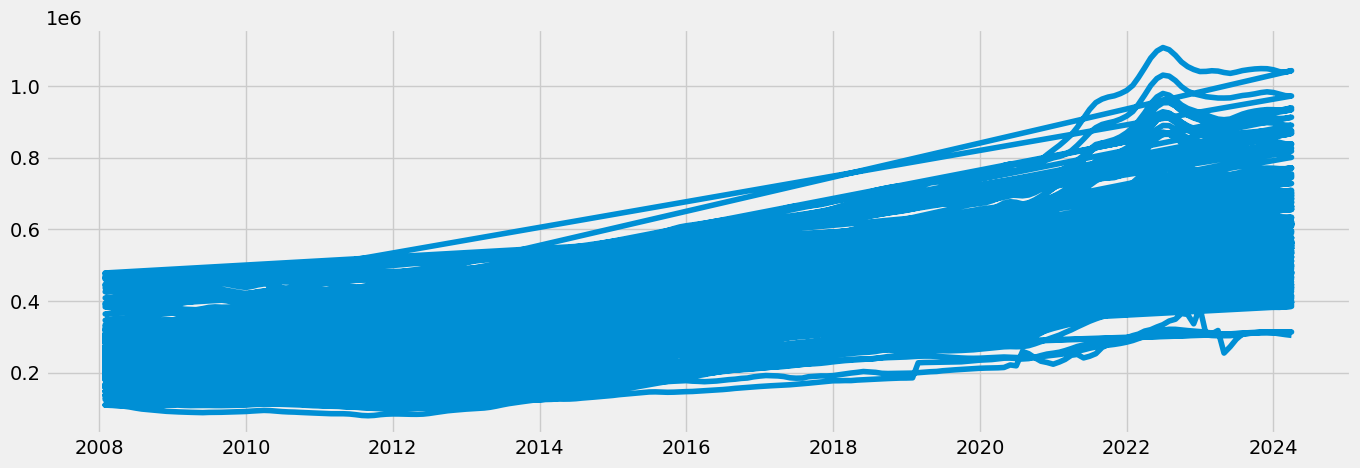

In [73]:
#plotting the data using  matplot lib 
plt.figure(figsize=(15,5), dpi = 100)

plt.plot(subset_filtered_data3)


In [74]:
#checking for missing values 
missing = subset_filtered_data3.isnull().sum()

In [75]:
#checking for duplicates
duplicates = subset_filtered_data3.duplicated().sum()

In [80]:

subset_filtered_data3_median = subset_filtered_data3.groupby('date')['median_value'].median().reset_index()
print(subset_filtered_data3_median)


          date   median_value
0   2008-01-31  240004.049841
1   2008-02-29  238820.825041
2   2008-03-31  237975.423814
3   2008-04-30  236356.172640
4   2008-05-31  234372.205301
..         ...            ...
190 2023-11-30  567420.231912
191 2023-12-31  567206.382710
192 2024-01-31  567351.746712
193 2024-02-29  567522.266091
194 2024-03-31  567775.577561

[195 rows x 2 columns]


In [85]:
subset_filtered_data3['date'] = pd.to_datetime(subset_filtered_data3_median['date'])

In [89]:
subset_filtered_data3_median = subset_filtered_data3_median.set_index('date')

In [90]:
print(subset_filtered_data3_median)

             median_value
date                     
2008-01-31  240004.049841
2008-02-29  238820.825041
2008-03-31  237975.423814
2008-04-30  236356.172640
2008-05-31  234372.205301
...                   ...
2023-11-30  567420.231912
2023-12-31  567206.382710
2024-01-31  567351.746712
2024-02-29  567522.266091
2024-03-31  567775.577561

[195 rows x 1 columns]


# When making the subset subset_filtered_data3_median my thought process was using data that aligned with my airbnb data. While the date a host signed up may not be the exact same as the time they bought the house it gives some indication. So I ultimately wanted to look at how the prices of houses changed in realtion to how prices are set based on when an airbnb owner signed up. I started by taking the zillow data and filtering it out so that only denver area zillow listings were included in the subset. I then filtered out dates prior to 2008 because 2008 is the earliest date I have in my airbnb data and I think it is best if these align. Then I was left with having multiple prices for each date from 2008 to present. Here I decided to take the median home price for each day because the average was likely to be skewed given the high and low end of housing in denver. This is what lead to my decision making that resulted in the subset subset_filtered_data3_median. 

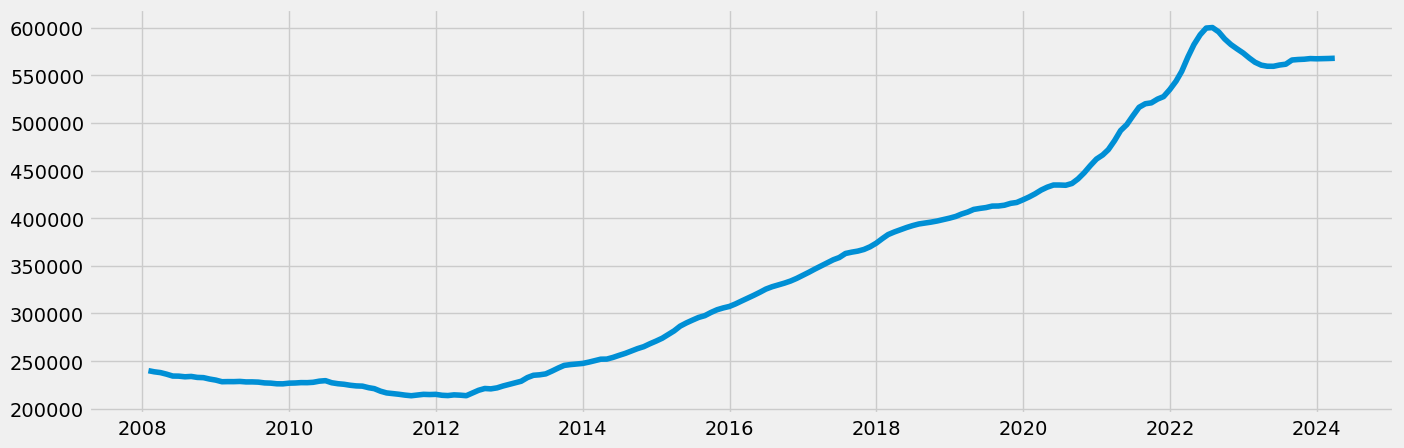

In [91]:
#plotting the data using  matplot lib 
plt.figure(figsize=(15,5), dpi = 100)

plt.plot(subset_filtered_data3_median)

In [97]:
subset_filtered_data3_median.isnull().sum()

median_value    0
dtype: int64

In [99]:
dups = subset_filtered_data3_median.duplicated()
dups.sum()

0

# time series analysis

In [92]:
#decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(subset_filtered_data3_median, model='additive')

In [93]:
from pylab import rcParams #defining a fixed size for all special charts
rcParams['figure.figsize'] = 18, 8

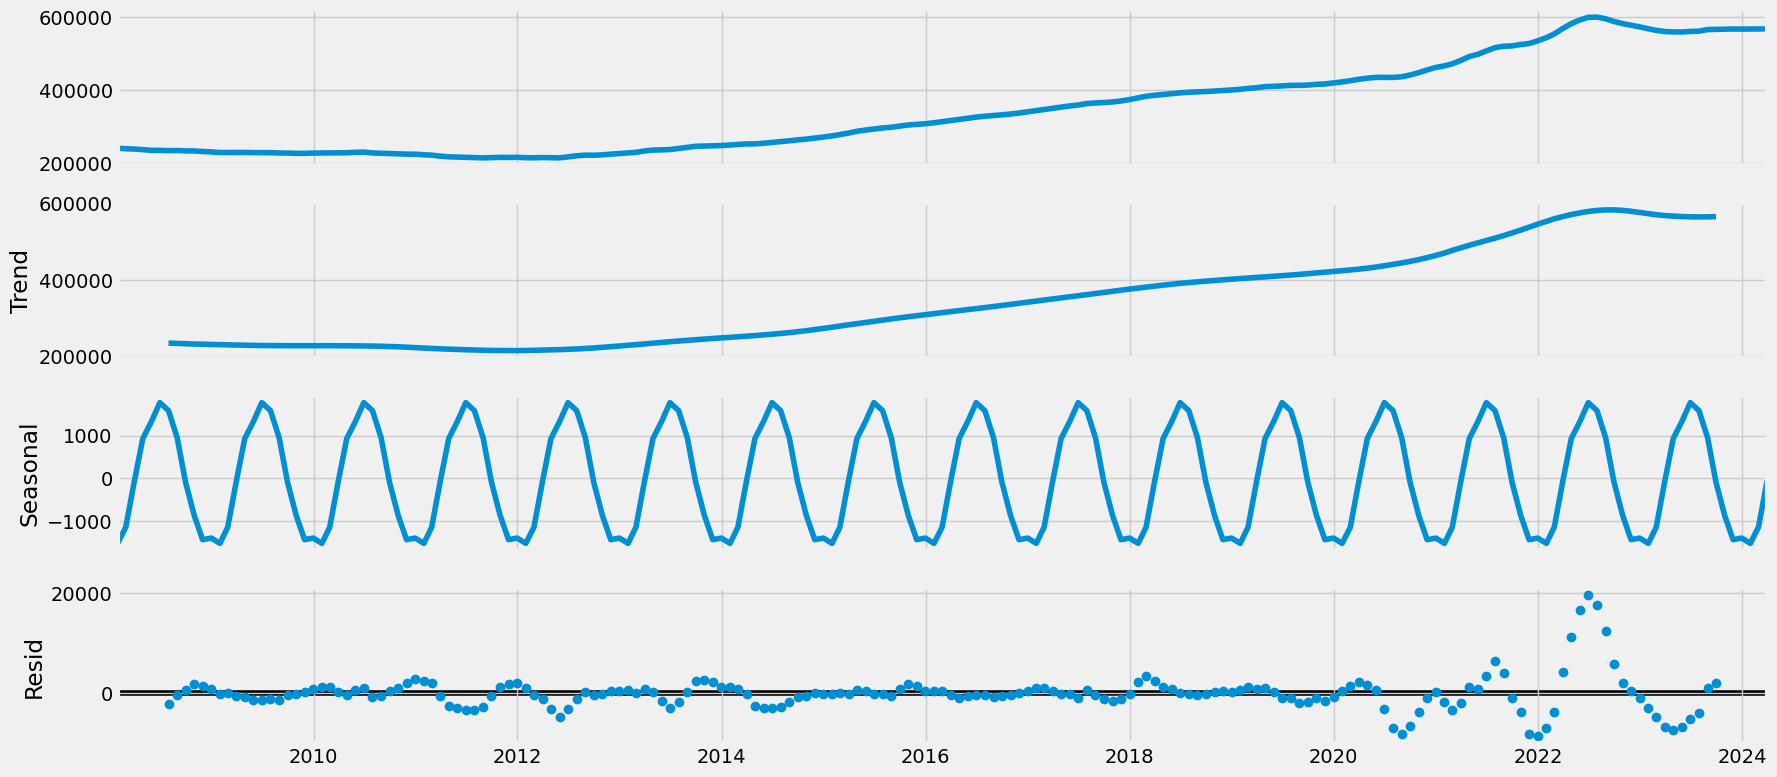

In [94]:
#plot the seperate components
decomposition.plot()
plt.show()

# The first chart shows that there is a rise in housing prices over time from 2008 to 2024. This is how the median changes over the years. The underlying trend below shows the same - that the general median price of homes is increasing. The similarity between the level and the trend indicates that there is likely not much noise in this data and I think that is due to choosing the median over the average home price. The next chart shows the seasonality which it does seem that there is a conssitent seasonality in median home prices. The presence of a trend and seasonality tells me that this is non-stationary. Th elast chart shows the residual and that there is very little noise aside from 2020 - 2024 which we know is the housing crisis and chaotic market we have been dealing with since covid. 

# Testing stationarity

In [100]:
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries):
    print('Dickey-Fuller Test')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

dickey_fuller(subset_filtered_data3_median['median_value'])

Dickey-Fuller Test
Test Statistic                   0.754150
p-value                          0.990859
Number of Lags Used              4.000000
Number of Observations Used    190.000000
Critical Value (1%)             -3.465244
Critical Value (5%)             -2.876875
Critical Value (10%)            -2.574945
dtype: float64


# The dickey fuller test confirms the non-stationarity of the data. The test statistic is much larger than the critical values so we know that that differencing will need to be done. This means we cannot reject the null hypothesis which is that the data is non-stationary. 

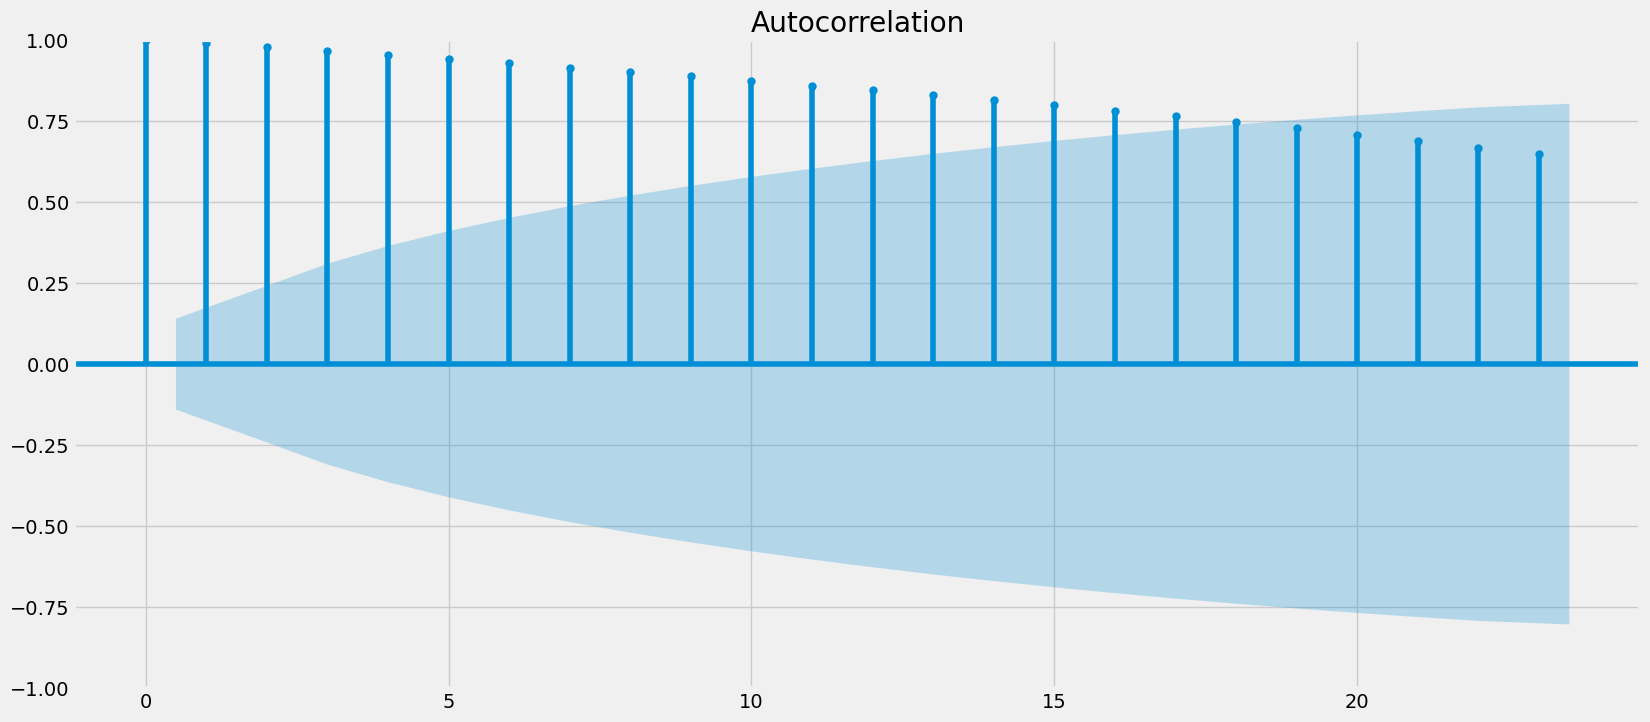

In [101]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(subset_filtered_data3_median)
plt.show()

# This autocorrelation graph further demonstrates the lack of stationarity because many of the blue ines rae well above the shaded blue region meaning many points are correlated with themselves at other points in time. 

# Stationarizing the zillow data 

In [104]:
#difference the data to make it stationary
data_diff = subset_filtered_data3_median - subset_filtered_data3_median.shift(1)

In [105]:
#dropping missing values that came from differnecing the data
data_diff.dropna(inplace=True)

In [106]:
data_diff.head()

,median_value
date,
2008-02-29,-1183.224800
2008-03-31,-845.401227
2008-04-30,-1619.251174
2008-05-31,-1983.967340
2008-06-30,-100.720583


In [107]:
data_diff.columns

Index(['median_value'], dtype='object')

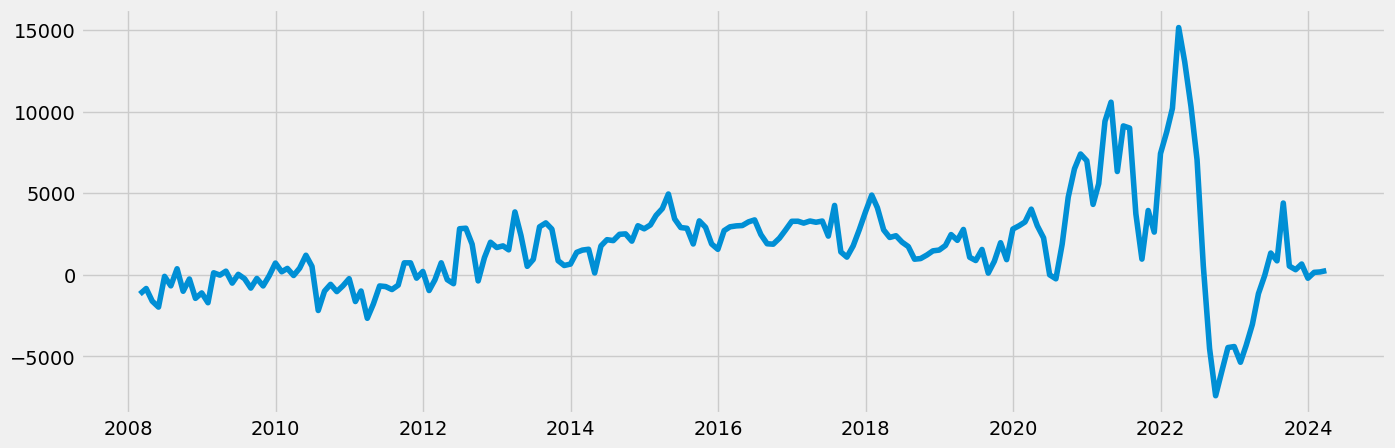

In [108]:
#seeing what diferencing did to the time series curve 
plt.figure(figsize=(15,5), dpi = 100)
plt.plot(data_diff)

In [109]:
dickey_fuller(data_diff)

Dickey-Fuller Test
Test Statistic                  -4.646628
p-value                          0.000106
Number of Lags Used              3.000000
Number of Observations Used    190.000000
Critical Value (1%)             -3.465244
Critical Value (5%)             -2.876875
Critical Value (10%)            -2.574945
dtype: float64


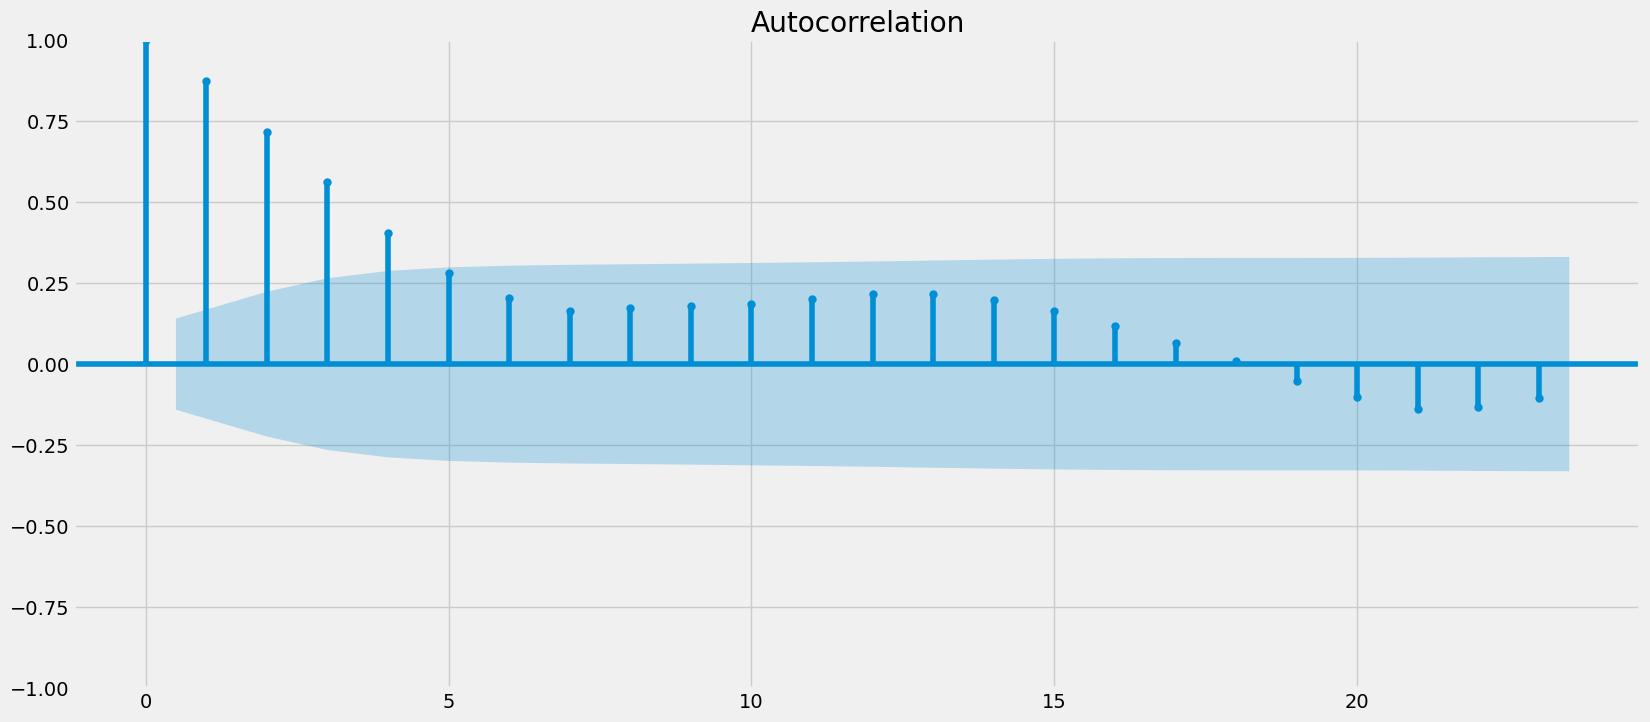

In [110]:
plot_acf(data_diff)
plt.show()

# after diferencing the test statistic is now smaller than the critical values which means we can reject the null that the data is non-stationary. Additionally when looking at the autocorrealtions we can see that there are fewer data points that are correlated to themselves which further indicates that the data is now stationary. 